<a href="https://colab.research.google.com/github/gyuholee94/NLP/blob/master/RESNET_%EC%98%AC%EB%9D%BC%EC%98%A8%EC%BD%94%EB%93%9C_%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python import

In [ ]:
# Import Module

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install tensorflow
import pandas as pd
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/My Drive/데이콘 팀플/train.csv')
test = pd.read_csv('/content/drive/My Drive/데이콘 팀플/test.csv')
train.shape

(2048, 787)

### EDA

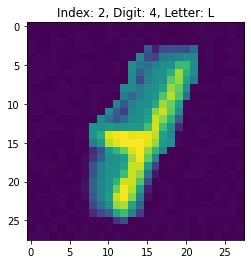

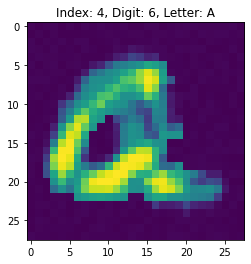

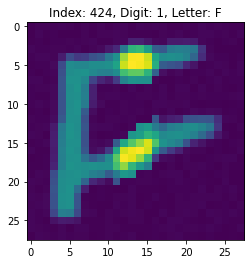

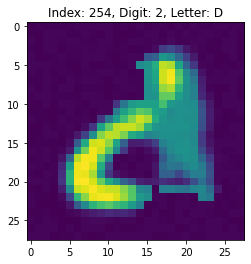

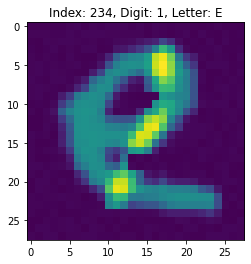

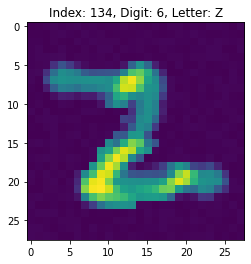

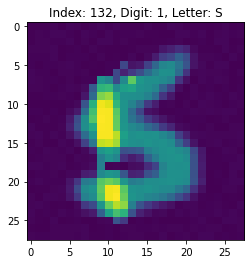

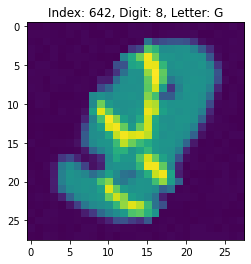

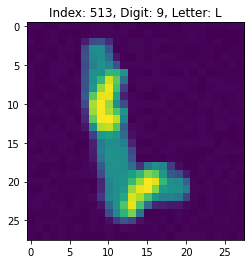

In [ ]:
idx_list = [2, 4, 424, 254, 234, 134, 132, 642, 513]
for idx in idx_list:
    img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
    digit = train.loc[idx, 'digit']
    letter = train.loc[idx, 'letter']

    plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
    plt.imshow(img)
    plt.show()

### Train model

In [ ]:
train_img = train.iloc[:,3:].to_numpy().reshape(-1,28,28,1)
train_digit = train['digit']
train_letter = train['letter']
test_img = test.iloc[:,2:].to_numpy().reshape(-1,28,28,1)
test_letter = test['letter']

In [ ]:
train_img_norm = train_img / 255.0
test_img_norm = test_img / 255.0

In [ ]:
features = train_img_norm
labels = train_digit.to_numpy()

X_test = test_img_norm

In [ ]:
from sklearn.model_selection import train_test_split

validation_split = 0.2

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size = validation_split, random_state = 1004)

In [ ]:
def createFolder(directory):
    
    import os
    
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except:
        print("Error: Falied creating directory" + directory)

In [ ]:
def plot_curve(epochs, hist, list_of_metrics):
    
    fig, ax = plt.subplots(1,2,figsize = (12, 8))
    
    for i in range(len(ax)):
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('Value')
        
        for n in range(len(list_of_metrics)):
            if i == 0:
                y = hist[list_of_metrics[n]]
                ax[i].plot(epochs, y)
                ax[i].set_title('Loss')
                if n == 1:
                    break
            else:
                if n >= 2:
                    y = hist[list_of_metrics[n]]
                    ax[i].plot(epochs, y)
                    ax[i].set_title('Accuracy')
                    
    plt.show()

In [ ]:
def create_cnn(learning_rate):
    
    # Remove the previous model.
    model = None
    
    # Input layer
    img_input = layers.Input(shape = (28,28,1))
    
    # CNN
    # Identity mapping shortcut을 위한 conv_1 layer
    conv_1 = layers.Conv2D(128, kernel_size = 3, padding = 'same', activation = 'relu')(img_input) 
    
    conv_2_1 = layers.Conv2D(128, kernel_size = 3, padding = 'same', activation = 'relu')(conv_1)
    conv_2_1 = layers.Conv2D(128, kernel_size = 3, padding = 'same')(conv_2_1)
    
    # ShortCut connection
    add_2_1 = layers.add([conv_1, conv_2_1])
    out_2_1 = layers.Activation('relu')(add_2_1)
    
    conv_2_2 = layers.Conv2D(128, kernel_size = 3, padding = 'same', activation = 'relu')(out_2_1)
    conv_2_2 = layers.Conv2D(128, kernel_size = 3, padding = 'same')(conv_2_2)
    
    # ShortCut connection
    add_2_2 = layers.add([out_2_1, conv_2_2])
    out_2_2 = layers.Activation('relu')(add_2_1)
    
    pool_2 = layers.MaxPool2D((2,2), strides = 2)(out_2_2)
    
    conv_3_0 = layers.Conv2D(256, kernel_size = 1, strides = 1)(pool_2)
    
    conv_3_1 = layers.Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu')(conv_3_0)
    conv_3_1 = layers.Conv2D(256, kernel_size = 3, padding = 'same')(conv_3_1)
    
    # ShortCut connection
    add_3_1 = layers.add([conv_3_0, conv_3_1])
    out_3_1 = layers.Activation('relu')(add_3_1)
    
    conv_3_2 = layers.Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu')(out_3_1)
    conv_3_2 = layers.Conv2D(256, kernel_size = 3, padding = 'same')(conv_3_2)
    
    # ShortCut connection
    add_3_2 = layers.add([out_3_1, conv_3_2])
    out_3_2 = layers.Activation('relu')(add_3_2)
    
    pool_3 = layers.MaxPool2D((2,2), strides = 2)(out_3_2)
    
    conv_4_0 = layers.Conv2D(256, kernel_size = 1, strides = 1)(pool_3)
    
    conv_4_1 = layers.Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu')(conv_4_0)
    conv_4_1 = layers.Conv2D(256, kernel_size = 3, padding = 'same')(conv_4_1)
    
    # ShortCut connection
    add_4_1 = layers.add([conv_4_0, conv_4_1])
    out_4_1 = layers.Activation('relu')(add_4_1)
    
    pool_4 = layers.MaxPool2D((2,2), strides = 2)(out_4_1)
    
    # FC layers
    img_features = layers.Flatten()(pool_4)
    img_features = layers.Dense(512, activation = 'relu')(img_features)
    img_features = layers.Dropout(rate = 0.5)(img_features)
    img_features = layers.Dense(512, activation = 'relu')(img_features)
    img_features = layers.Dropout(rate = 0.5)(img_features)
    
    # Output layer
    digit_pred = layers.Dense(10, activation = 'softmax')(img_features)
    
    model = keras.Model(inputs = img_input, outputs = digit_pred)
    
    model.compile(optimizer = tf.keras.optimizers.Adam(lr = learning_rate),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
                    
    return model

In [ ]:
def train_model_v1(model, X_train, y_train, X_val, y_val, epochs, batch_size = None, validation_split = 0.1):
    
    callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)
    
    history = model.fit(x = X_train, y = y_train, epochs = epochs, batch_size = batch_size,
                       shuffle = True, validation_data = [X_val, y_val], callbacks = [callback])
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

def train_model_v2(model, X_train, y_train, X_val, y_val, epochs, batch_size = None, validation_split = 0.1):
    
    callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
    
    history = model.fit(x = X_train, y = y_train, epochs = epochs, batch_size = batch_size,
                       shuffle = True, validation_data = [X_val, y_val], callbacks = [callback])
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

In [ ]:
model_list = []

for i in range(10):
    model = create_cnn(learning_rate = 0.0001)
    model_list.append(model)

***************Trainig_my_model_0*****************
Epoch 1/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.3073 - accuracy: 0.1044 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.1938 - accuracy: 0.1893 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/200
1638/1638 [==============================] - 9s 6ms/step - loss: 1.4787 - accuracy: 0.4982 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.8892 - accuracy: 0.7125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/200
1638/1638 [==============================] - 10s 6ms/step - loss: 0.6473 - accuracy: 0.7900 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.4877 - accuracy: 0.8413 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/200
1638/1638 [=======

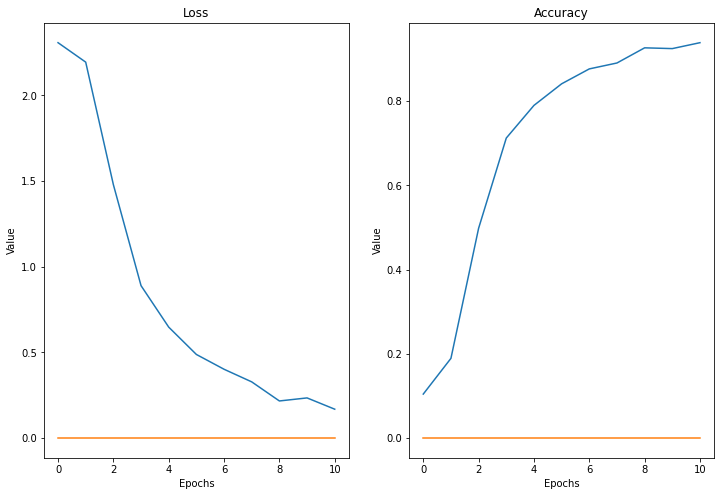

***************Trainig_my_model_1*****************
Epoch 1/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.3058 - accuracy: 0.1142 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.1625 - accuracy: 0.2112 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/200
1638/1638 [==============================] - 9s 6ms/step - loss: 1.4420 - accuracy: 0.5189 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.8975 - accuracy: 0.7057 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.6707 - accuracy: 0.7759 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.5166 - accuracy: 0.8339 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/200
1638/1638 [========

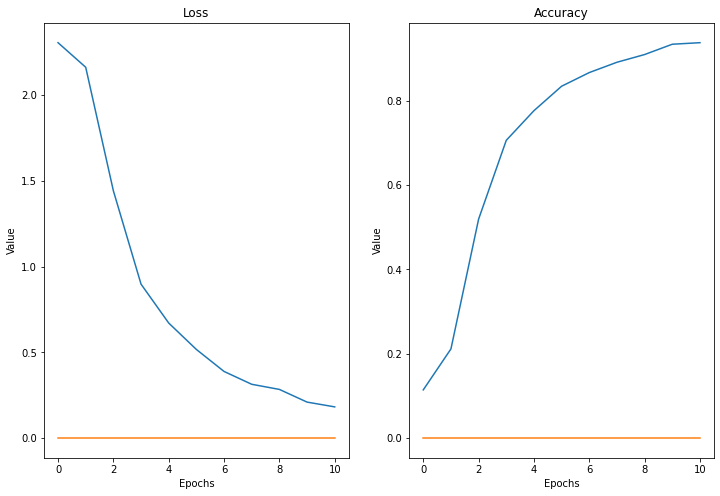

***************Trainig_my_model_2*****************
Epoch 1/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.3067 - accuracy: 0.1013 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.2858 - accuracy: 0.1252 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/200
1638/1638 [==============================] - 9s 6ms/step - loss: 1.8061 - accuracy: 0.3773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/200
1638/1638 [==============================] - 9s 6ms/step - loss: 1.0542 - accuracy: 0.6404 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.7424 - accuracy: 0.7607 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.5589 - accuracy: 0.8181 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/200
1638/1638 [========

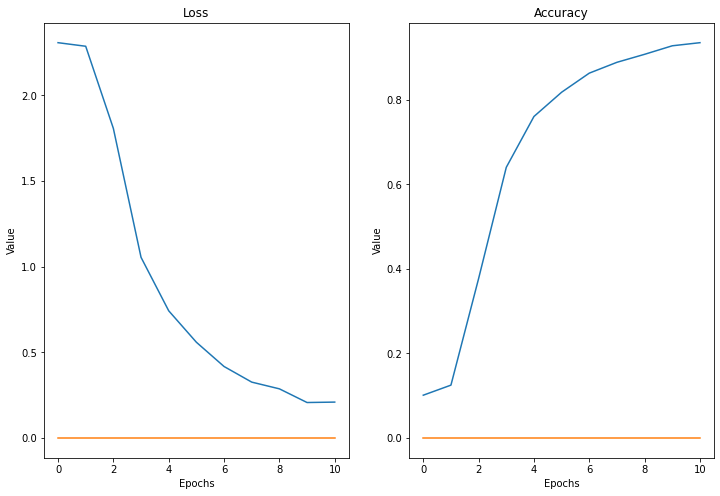

***************Trainig_my_model_3*****************
Epoch 1/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.3055 - accuracy: 0.1111 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.2409 - accuracy: 0.1557 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/200
1638/1638 [==============================] - 9s 6ms/step - loss: 1.6515 - accuracy: 0.4188 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.9879 - accuracy: 0.6648 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/200
1638/1638 [==============================] - 10s 6ms/step - loss: 0.7182 - accuracy: 0.7747 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.5396 - accuracy: 0.8272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/200
1638/1638 [=======

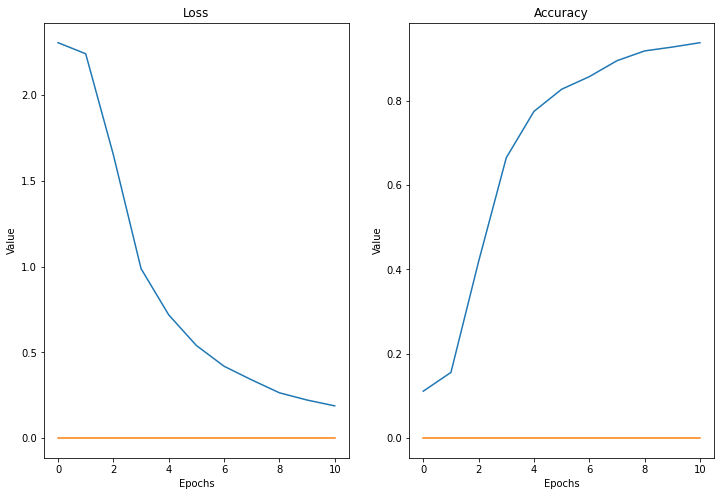

***************Trainig_my_model_4*****************
Epoch 1/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.3088 - accuracy: 0.1038 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.2730 - accuracy: 0.1392 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/200
1638/1638 [==============================] - 9s 6ms/step - loss: 1.8586 - accuracy: 0.3504 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/200
1638/1638 [==============================] - 9s 6ms/step - loss: 1.0614 - accuracy: 0.6429 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.7254 - accuracy: 0.7650 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.5664 - accuracy: 0.8168 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/200
1638/1638 [========

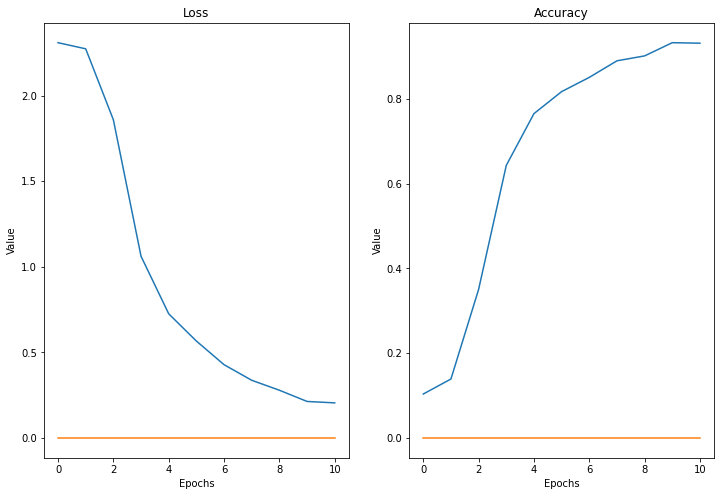

***************Trainig_my_model_5*****************
Epoch 1/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.3049 - accuracy: 0.0977 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.1999 - accuracy: 0.1899 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/200
1638/1638 [==============================] - 9s 6ms/step - loss: 1.5732 - accuracy: 0.4487 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.9849 - accuracy: 0.6923 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.6952 - accuracy: 0.7918 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.4980 - accuracy: 0.8388 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/200
1638/1638 [========

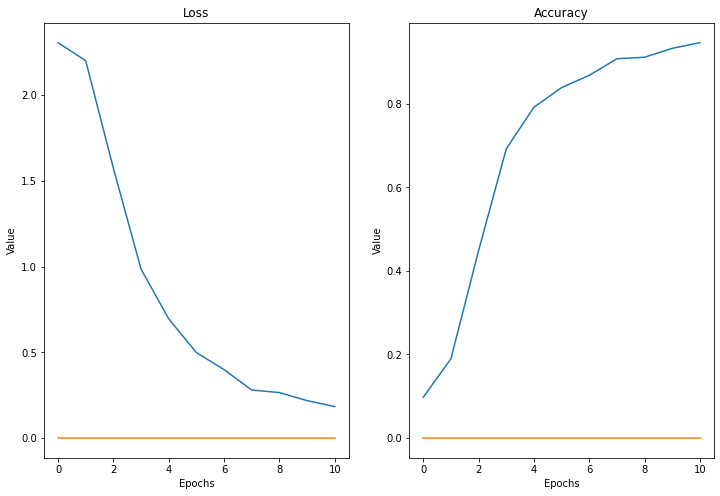

***************Trainig_my_model_6*****************
Epoch 1/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.3084 - accuracy: 0.1062 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.2582 - accuracy: 0.1465 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/200
1638/1638 [==============================] - 9s 6ms/step - loss: 1.6371 - accuracy: 0.4365 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.9517 - accuracy: 0.6752 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.6980 - accuracy: 0.7790 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.5461 - accuracy: 0.8309 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/200
1638/1638 [========

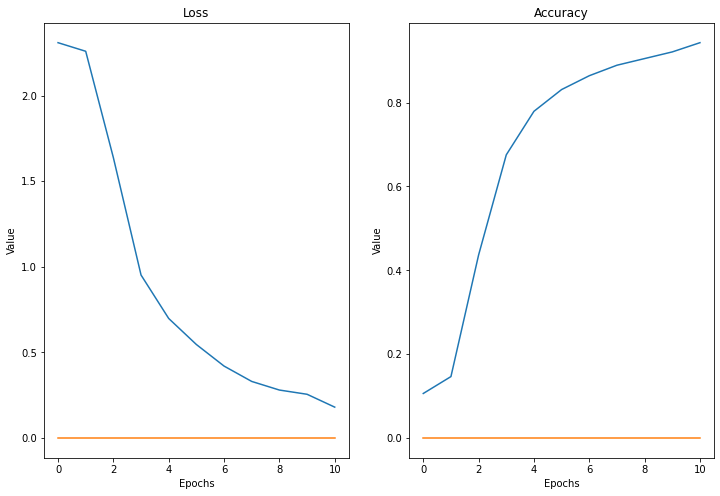

***************Trainig_my_model_7*****************
Epoch 1/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.3078 - accuracy: 0.1123 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.1908 - accuracy: 0.1972 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/200
1638/1638 [==============================] - 9s 6ms/step - loss: 1.4196 - accuracy: 0.5299 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.8699 - accuracy: 0.7149 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.6082 - accuracy: 0.8022 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.5005 - accuracy: 0.8419 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/200
1638/1638 [========

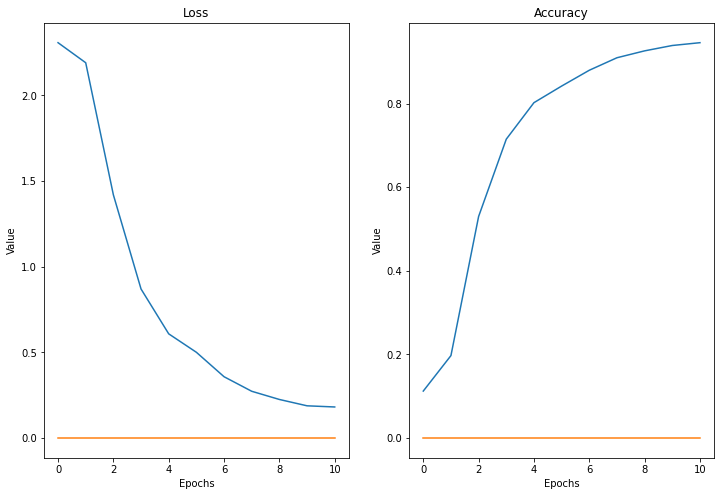

***************Trainig_my_model_8*****************
Epoch 1/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.3079 - accuracy: 0.1166 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
1638/1638 [==============================] - 9s 5ms/step - loss: 2.2098 - accuracy: 0.1716 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/200
1638/1638 [==============================] - 9s 5ms/step - loss: 1.6076 - accuracy: 0.4457 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/200
1638/1638 [==============================] - 9s 5ms/step - loss: 0.9186 - accuracy: 0.6825 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.6381 - accuracy: 0.7973 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.4858 - accuracy: 0.8571 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/200
1638/1638 [========

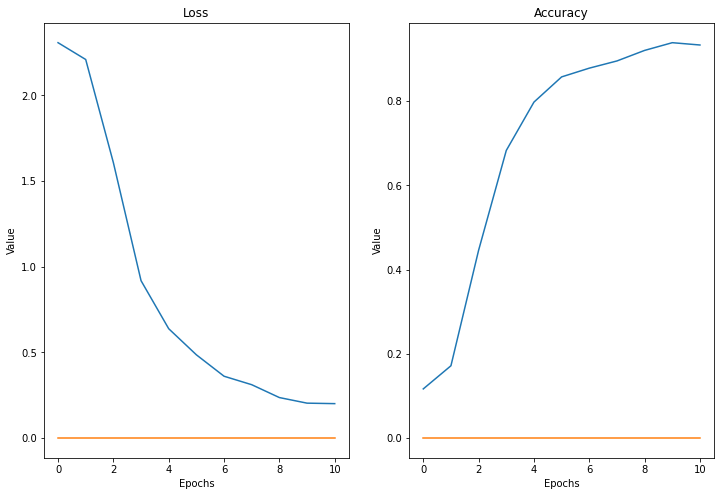

***************Trainig_my_model_9*****************
Epoch 1/200
1638/1638 [==============================] - 9s 6ms/step - loss: 2.3064 - accuracy: 0.1117 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
1638/1638 [==============================] - 9s 5ms/step - loss: 2.2410 - accuracy: 0.1569 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/200
1638/1638 [==============================] - 9s 5ms/step - loss: 1.5900 - accuracy: 0.4475 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/200
1638/1638 [==============================] - 9s 5ms/step - loss: 1.0101 - accuracy: 0.6709 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/200
1638/1638 [==============================] - 9s 5ms/step - loss: 0.6922 - accuracy: 0.7778 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/200
1638/1638 [==============================] - 9s 6ms/step - loss: 0.5389 - accuracy: 0.8199 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/200
1638/1638 [========

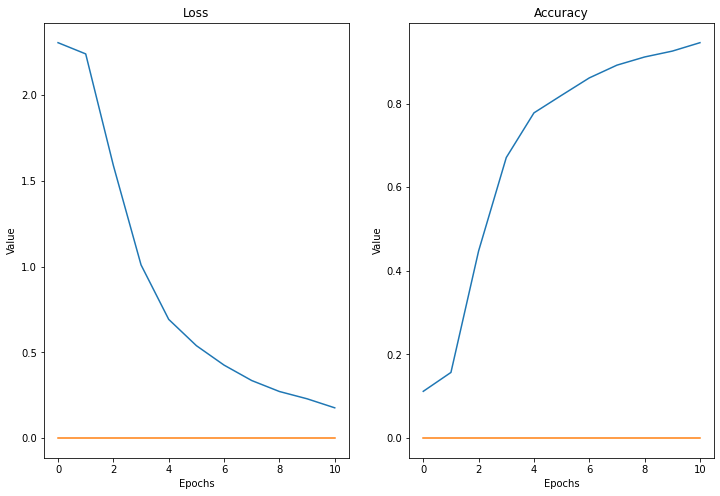

In [ ]:
### Training
epochs = 200
batch_size = 1
validation_split = 0.15

for i in range(len(model_list)):
    print("***************Trainig_my_model_{}*****************".format(i))
    epoch, hist = train_model_v1(model_list[i], X_train, y_train, X_val, y_val, epochs, batch_size) 

    # Plot a graph of the metric vs. epochs.
    list_of_metrics_to_plot = ['loss','val_loss','accuracy','val_accuracy']
    plot_curve(epoch, hist, list_of_metrics_to_plot)

In [ ]:
pred_list = []

for i in range(len(model_list)):
    print("************************Predicting_my_model_{}************************".format(i))
    pred = model_list[i].predict(X_test)
    pred_list.append(pred)

************************Predicting_my_model_0************************
************************Predicting_my_model_1************************
************************Predicting_my_model_2************************
************************Predicting_my_model_3************************
************************Predicting_my_model_4************************
************************Predicting_my_model_5************************
************************Predicting_my_model_6************************
************************Predicting_my_model_7************************
************************Predicting_my_model_8************************
************************Predicting_my_model_9************************


In [ ]:
pred_df = pd.DataFrame(test["id"])
final_pred = np.array([0] * 204800).reshape(20480, 10)

for i in range(len(model_list)):
    pred_df['pred{}'.format(i)] = np.argmax(pred_list[i], axis = 1)
    final_pred = final_pred + pred_list[i]

pred_df['final_pred'] = np.argmax(final_pred, axis = 1)

In [ ]:
pred_df

,id,pred0,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,final_pred
0,2049,5,3,5,5,5,2,6,5,5,2,5
1,2050,2,3,5,5,5,2,6,5,5,2,5
2,2051,2,3,5,5,5,2,6,5,5,2,2
3,2052,2,3,5,5,5,2,6,5,5,2,2
4,2053,2,3,5,5,5,2,6,5,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,2,3,5,5,5,2,6,5,5,2,5
20476,22525,2,3,5,5,5,2,6,5,5,2,5
20477,22526,2,3,5,5,5,2,6,5,5,2,2
20478,22527,2,3,5,5,5,2,6,5,5,2,5


In [ ]:
re_model_list = []

for i in range(len(model_list)):
    print("************************Loading_my_model_{}************************".format(i))
    # my_model = tf.keras.models.load_model('/content/drive/My Drive/데이콘 팀플/model_list/model{}'.format(i))
    model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.00001),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    
    print("************************Re-training_my_model_{}************************".format(i))
    model.fit(X_val, y_val, epochs = 20, batch_size = 1)
    
    re_model_list.append(model)

************************Loading_my_model_0************************
************************Re-training_my_model_0************************
Epoch 1/20
410/410 [==============================] - 2s 5ms/step - loss: 2.2916 - accuracy: 0.1244
Epoch 2/20
410/410 [==============================] - 2s 5ms/step - loss: 2.2937 - accuracy: 0.0951
Epoch 3/20
410/410 [==============================] - 2s 5ms/step - loss: 2.2920 - accuracy: 0.1195
Epoch 4/20
410/410 [==============================] - 2s 5ms/step - loss: 2.2730 - accuracy: 0.1488
Epoch 5/20
410/410 [==============================] - 2s 5ms/step - loss: 2.2598 - accuracy: 0.1463
Epoch 6/20
410/410 [==============================] - 2s 5ms/step - loss: 2.2214 - accuracy: 0.1878
Epoch 7/20
410/410 [==============================] - 2s 5ms/step - loss: 2.1713 - accuracy: 0.2024
Epoch 8/20
410/410 [==============================] - 2s 5ms/step - loss: 2.0998 - accuracy: 0.2390
Epoch 9/20
410/410 [==============================] - 2s 5ms/s

In [ ]:
# test_set 예측하기

re_pred_list = []

for i in range(len(model_list)):
    print("************************Predicting_my_re_model_{}************************".format(i))
    pred = re_model_list[i].predict(X_test)
    re_pred_list.append(pred)

************************Predicting_my_re_model_0************************
************************Predicting_my_re_model_1************************
************************Predicting_my_re_model_2************************
************************Predicting_my_re_model_3************************
************************Predicting_my_re_model_4************************
************************Predicting_my_re_model_5************************
************************Predicting_my_re_model_6************************
************************Predicting_my_re_model_7************************
************************Predicting_my_re_model_8************************
************************Predicting_my_re_model_9************************


In [ ]:
re_pred_df = pd.DataFrame(test["id"])
re_final_pred = np.array([0] * 204800).reshape(20480, 10)

for i in range(len(model_list)):
    re_pred_df['pred{}'.format(i)] = np.argmax(re_pred_list[i], axis = 1)
    re_final_pred = re_final_pred + re_pred_list[i]

re_pred_df['final_pred'] = np.argmax(re_final_pred, axis = 1)

In [ ]:
re_pred_df

,id,pred0,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,final_pred
0,2049,6,6,6,6,6,6,6,6,6,6,6
1,2050,8,8,8,8,8,8,8,8,8,8,8
2,2051,2,2,2,2,2,2,2,2,2,2,2
3,2052,0,0,0,0,0,0,0,0,0,0,0
4,2053,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,4,4,4,4,4,4,4,4,4,4,4
20476,22525,1,1,1,1,1,1,1,1,1,1,1
20477,22526,6,6,6,6,6,6,6,6,6,6,6
20478,22527,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# 파일 제출
name = 'test0905_3'

submission = re_pred_df[['id', 'final_pred']].rename(columns = {'final_pred' : 'digit'})
submission.to_csv('/content/drive/My Drive/데이콘 팀플/{}.csv'.format(name), index=False)
model.save('/content/drive/My Drive/데이콘 팀플/{}.h5'.format(name))